In [1]:
import pickle
from pathlib import Path
from typing import Sequence

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator, interp1d

In [2]:
cwd = Path().resolve()
cwd

WindowsPath('C:/Users/ogras/Documents/GitHub/CeNTREX-RC-microwaves')

In [3]:
def interpolate_1D(
    fname: str, path: Path, indices: Sequence[int]
) -> interp1d:
    data = np.loadtxt(path / fname, skiprows=1, delimiter=",")

    x, y = data.T[indices]
    return interp1d(x,y)


def interpolate_2D(
    fname: str, path: Path, indices: Sequence[int]
) -> RegularGridInterpolator:
    data = np.loadtxt(path / fname, skiprows=1, delimiter=",")

    x, y, z = data.T[indices]
    _, idx = np.unique(x, return_index=True)
    x = x[np.sort(idx)]
    _, idy = np.unique(y, return_index=True)
    y = y[np.sort(idy)]

    return RegularGridInterpolator((x, y), z.reshape(len(x), len(y)))


# Calibrate SyntHD Pro S/N 415

In [4]:
fname_RFA = "2023_02_13_synthHDPro_SN415_RFA_scan.csv"
fname_RFB = "2023_02_14_synthHDPro_SN415_RFB_scan.csv"

# files have frequency [Hz], SynthHD power [dBm], det power [dBm]

data_RFA = np.loadtxt(
    cwd / "measurements SynthHD/data" / fname_RFA, skiprows=1, delimiter=","
)
data_RFB = np.loadtxt(
    cwd / "measurements SynthHD/data" / fname_RFB, skiprows=1, delimiter=","
)


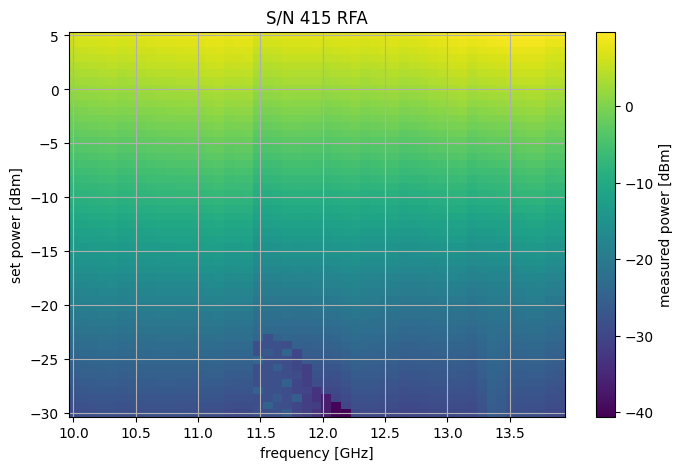

In [5]:
x,y,z = data_RFA.T

x_size, y_size = len(np.unique(x)), len(np.unique(y))

x = x.reshape(x_size, y_size) / 1e9
y = y.reshape(x_size, y_size)
z = z.reshape(x_size, y_size)

fig, ax = plt.subplots(figsize = (8,5))
c = ax.pcolormesh(x,y,z)

ax.set_xlabel("frequency [GHz]")
ax.set_ylabel("set power [dBm]")

cbar = fig.colorbar(c)
cbar.ax.set_ylabel("measured power [dBm]")

ax.set_title("S/N 415 RFA")
ax.grid(True)

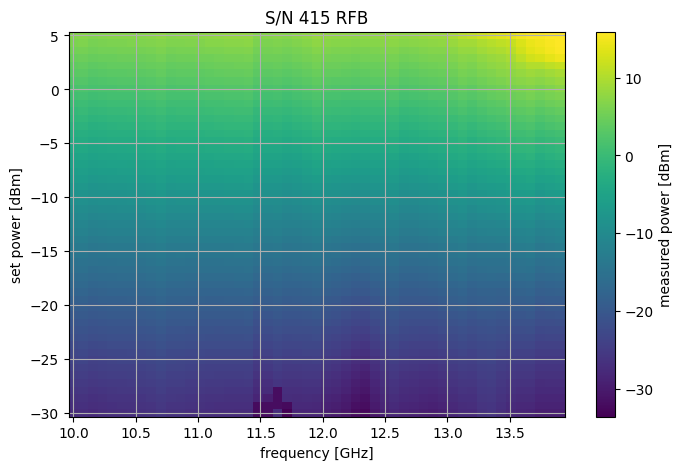

In [6]:
x,y,z = data_RFB.T

x_size, y_size = len(np.unique(x)), len(np.unique(y))

x = x.reshape(x_size, y_size) / 1e9
y = y.reshape(x_size, y_size)
z = z.reshape(x_size, y_size)

fig, ax = plt.subplots(figsize = (8,5))
c = ax.pcolormesh(x,y,z)

ax.set_xlabel("frequency [GHz]")
ax.set_ylabel("set power [dBm]")

cbar = fig.colorbar(c)
cbar.ax.set_ylabel("measured power [dBm]")

ax.set_title("S/N 415 RFB")
ax.grid(True)

In [7]:
x, y, z = data_RFA.T
x = np.unique(x)
y = np.unique(y)

fn_interpolate_SN415_RFA = RegularGridInterpolator((x, y), z.reshape(len(x), len(y)))

x, y, z = data_RFB.T
x = np.unique(x)
y = np.unique(y)

fn_interpolate_SN415_RFB = RegularGridInterpolator((x, y), z.reshape(len(x), len(y)))


# Calibrate SyntHD Pro S/N 416

In [8]:
fname_RFB = "2023_02_10_synthHDPro_SN416_RFB_scan.csv"

# files have frequency [Hz], SynthHD power [dBm], det power [dBm]

data_RFB = np.loadtxt(
    cwd / "measurements SynthHD/data" / fname_RFB, skiprows=1, delimiter=","
)


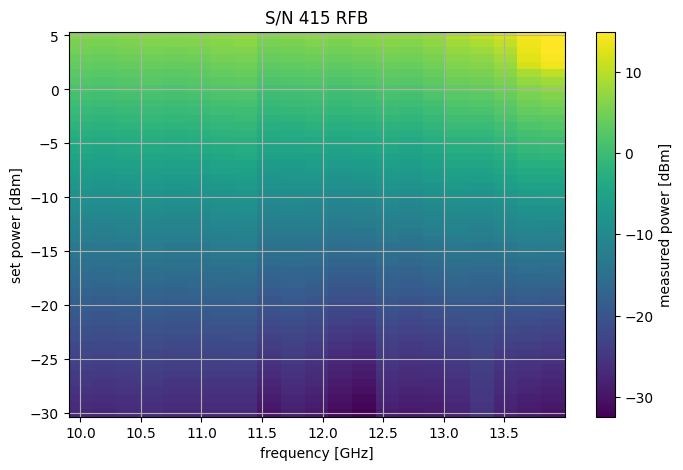

In [9]:
x,y,z = data_RFB.T

x_size, y_size = len(np.unique(x)), len(np.unique(y))

x = x.reshape(x_size, y_size) / 1e9
y = y.reshape(x_size, y_size)
z = z.reshape(x_size, y_size)

fig, ax = plt.subplots(figsize = (8,5))
c = ax.pcolormesh(x,y,z)

ax.set_xlabel("frequency [GHz]")
ax.set_ylabel("set power [dBm]")

cbar = fig.colorbar(c)
cbar.ax.set_ylabel("measured power [dBm]")

ax.set_title("S/N 415 RFB")
ax.grid(True)

In [10]:
x, y, z = data_RFB.T
x = np.unique(x)
y = np.unique(y)

fn_interpolate_SN416_RFB = RegularGridInterpolator((x, y), z.reshape(len(x), len(y)))


# 26.6 GHz 
## Amplifier 1

In [11]:
fname = "2023_2_9_synthpower_vg1.csv"
# files have SynthHD power [dBm], VG1 [V], det power [dBm], amp current [A], amp power[W]

fn_interpolate_26_6GHz_A1 = interpolate_2D(fname, cwd / "measurements 26 GHz 2023_2/data", [0,1,2])

print(fn_interpolate_26_6GHz_A1([5, 0.7]))

[23.9640036]


### Calibrate to real input power

In [12]:
# dBm setpoints from SynthHD Pro SN 416 RFB
setpoints_416 = fn_interpolate_26_6GHz_A1.grid[0]
points = np.vstack([np.ones(len(setpoints_416)) * 13.3e9, setpoints_416]).T
real_power = fn_interpolate_SN416_RFB(points)

grid = list(fn_interpolate_26_6GHz_A1.grid)
grid[0] = real_power
fn_interpolate_26_6GHz_A1.grid = tuple(grid)

In [13]:
print(fn_interpolate_26_6GHz_A1([5, 0.7]))

[24.79500217]


## Amplifier 2

In [14]:
fname = "2023_2_9_synthpower_vg2.csv"

# files have SynthHD power [dBm], VG2 [V], det power [dBm], amp current [A], amp power[W]

fn_interpolate_26_6GHz_A2 = interpolate_2D(fname, cwd / "measurements 26 GHz 2023_2/data", [0,1,2])

### Calibrate to real input power

In [15]:
# dBm setpoints from SynthHD Pro SN 416 RFB
setpoints_416 = fn_interpolate_26_6GHz_A2.grid[0]
points = np.vstack([np.ones(len(setpoints_416)) * 13.3e9, setpoints_416]).T
real_power = fn_interpolate_SN416_RFB(points)

grid = list(fn_interpolate_26_6GHz_A2.grid)
grid[0] = real_power
fn_interpolate_26_6GHz_A2.grid = tuple(grid)

# 40 GHz

No 2D scans since here there's only a single supply, no bias voltage, and this saturates
above ~7V.

## Amplifier 1

In [16]:
fname = "2023_2_10_a1_synthd_power.csv"

# syntHD power [dBm], det power [dBm], amp current [A], amp power [A]

fn_interpolate_40GHz_A1 = interpolate_1D(
    fname, cwd / "measurements 40 GHz 2023_2/data", indices=[0, 1]
)

### Calibrate to real input power

In [17]:
# forgot to add 20 dBm to compensate attenuation from directional coupler
fn_interpolate_40GHz_A1.y += 20

# dBm setpoints from SynthHD Pro SN 416 RFB
setpoints_416 = fn_interpolate_40GHz_A1.x
points = np.vstack([np.ones(len(setpoints_416)) * 10e9, setpoints_416]).T
real_power = fn_interpolate_SN416_RFB(points)

fn_interpolate_40GHz_A1.x = real_power

## Amplifier 2

In [18]:
fname = "2023_2_10_a2_synthd_power.csv"

# syntHD power [dBm], det power [dBm], amp current [A], amp power [A]

fn_interpolate_40GHz_A2 = interpolate_1D(
    fname, cwd / "measurements 40 GHz 2023_2/data", indices=[0, 1]
)


In [19]:
# forgot to add 20 dBm to compensate attenuation from directional coupler
fn_interpolate_40GHz_A2.y += 20

# dBm setpoints from SynthHD Pro SN 416 RFB
setpoints_416 = fn_interpolate_40GHz_A2.x
points = np.vstack([np.ones(len(setpoints_416)) * 10e9, setpoints_416]).T
real_power = fn_interpolate_SN416_RFB(points)

fn_interpolate_40GHz_A2.x = real_power

# Save interpolations

In [20]:
with open("calibration.pkl", "wb") as f:
    data = dict([
        ("26_7", (fn_interpolate_26_6GHz_A1, fn_interpolate_26_6GHz_A2)),
        ("40", (fn_interpolate_40GHz_A1, fn_interpolate_40GHz_A2)),
        ("synthesizers", dict([
            ("SynthHD Pro SN415", (fn_interpolate_SN415_RFA, fn_interpolate_SN415_RFB)),
            ("SynthHD Pro SN416", (fn_interpolate_SN416_RFB, ))
        ]))
    ])
    pickle.dump(data, f)